<a href="https://colab.research.google.com/github/isb-cgc/Community-Notebooks/blob/master/HTAN/Python%20Notebooks/Explore_HTAN_Clinical_Biospecimen_Assay_Metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore HTAN Clinical, Biospecimen, and Assay Metadata


        Title:   Explore HTAN Clinical, Biospecimen, and Assay Metadata in Python
        Author:  Clarisse Lau (clau@systemsbiology.org)
        Created: July 27, 2022
        Purpose: Explore HTAN metadata tables in Python
        URL:     NA
        Notes:   NA


# 1. Introduction & Overview
[HTAN](https://humantumoratlas.org/) is a National Cancer Institute (NCI)-funded Cancer Moonshot<sup>SM</sup> initiative to construct 3-dimensional atlases of the dynamic cellular, morphological, and molecular features of human cancers as they evolve from precancerous lesions to advanced disease. [Cell April 2020](https://www.sciencedirect.com/science/article/pii/S0092867420303469) 

Clinical data, sample biospecimen data and assay files in HTAN have a rich set of annotations supplied by HTAN data contributors. These annotations are made according to the [HTAN Data model](https://data.humantumoratlas.org/standards), a set of standards defined by the HTAN consortium. The supplied values of these attributes have been collected into comprehensive data tables on the cloud, using the Google BigQuery structure that is part of Google Cloud Project.

This notebook shows one example of how data can be accessed and analyzed using Python.

## 1.1 Goal
This example notebook illustrates how to make use of HTAN Google BigQuery metadata tables to tabulate and plot available HTAN clinical, biospecimen, and assay metadata describing files available from [HTAN](https://data.humantumoratlas.org/). Summaries for other available metadata attributes can be generated by extending these examples.

## 1.2 Inputs, Outputs, & Data
The originating data can be found on the [HTAN Data Portal](https://data.humantumoratlas.org/), and the compiled tables are on the [Cancer Gateway in the Cloud](https://isb-cgc.appspot.com/).

## 1.3 Notes
The tables correspond to HTAN Data Version 2.

# 2. Environment & Library Setup



In [106]:
# Import libraries
from IPython.display import Markdown as md
import pandas as pd

The following snippet controls plotting parameters.

In [107]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

# 3. Google Authentication

Running the BigQuery cells in this notebook requires a Google Cloud Project, instructions for creating a project can be found in the [Google Documentation](https://cloud.google.com/resource-manager/docs/creating-managing-projects#console). The instance needs to be authorized to bill the project for queries. For more information on getting started in the cloud see [Quick Start Guide to ISB-CGC](https://isb-cancer-genomics-cloud.readthedocs.io/en/latest/sections/HowToGetStartedonISB-CGC.html) and alternative authentication methods can be found in the [Google Documentation](https://cloud.google.com/resource-manager/docs/creating-managing-projects#console).

In [108]:
# GCP Libraries
from google.cloud import bigquery
from google.colab import auth
# if you're using Google Colab, authenticate to gcloud with the following
auth.authenticate_user()
# alternatively, use the gcloud SDK
#!gcloud auth application-default login

In [ ]:
# Alternatively, if you're running the notebook locally,
# on the command line use "gcloud auth application-default login"
# to generate a key, take note of where your credentials are saved
# and set the GOOGLE_APPLICATION_CREDENTIALS environment variable using
# the jupyter magic command "%env GOOGLE_APPLICATION_CREDENTIALS=<path to key>"
# then import "from google.cloud import bigquery"
# and you can continue to creating the BigQuery client below.

In [109]:
## Setup ##

# set the google project that will be billed for this notebook's computations
google_project = 'your-project'

# Create a client to access the data within BigQuery
client = bigquery.Client(google_project)

# 4. Analyzing Clinical Data in HTAN

In the [HTAN Data model](https://data.humantumoratlas.org/standards), [Tier 1 Clinical Data](https://data.humantumoratlas.org/standard/clinical) has seven components: Demographics, Diagnosis, Exposure, Family History, Follow Up, Molecular Test, and Therapy. All HTAN demographic data is collected into a single Demographics table (*isb-cgc-bq.HTAN.clinical_tier1_demographics_current*) in Google BigQuery containing data across all [HTAN Centers](https://humantumoratlas.org/research-network). The same is true of Diagnosis, and so on.

### 4.1 Demographics
Let's look at demographic distributions in HTAN. We begin by constructing an SQL query (as a string), then sending that
as query to HTAN Google BigQuery to retrieve the Demographics table. We remove a few unneeded bookkeeping columns.

In [110]:
demographics = client.query("""
  SELECT DISTINCT * EXCEPT(entityId, Component, Data_Release) FROM `isb-cgc-bq.HTAN.clinical_tier1_demographics_current` 
    """).result().to_dataframe()

demographics['HTAN_Center'] = [x.replace('HTAN ','') for x in demographics['HTAN_Center']] 

In [131]:
md("The number of rows of this table is the number of participants for which demographics is reported: len(demographics) = {}. The list of IDs of all HTAN Participants with demographic annotations is".format(len(demographics)))

The number of rows of this table is the number of participants for which demographics is reported: len(demographics) = 1218. The list of IDs of all HTAN Participants with demographic annotations is

In [112]:
participant_list = demographics['HTAN_Participant_ID']

In [132]:
md("There are len(participant_list) = {} participants with demographic annotations.".format(len(participant_list)))

There are len(participant_list) = 1218 participants with demographic annotations.

Participants per HTAN center

In [114]:
participant_count_by_center = demographics.groupby(['HTAN_Center'])['HTAN_Participant_ID'].count()
participant_count_by_center

HTAN_Center
BU               6
CHOP            30
Duke           680
HMS            105
HTAPP          180
MSK             87
Stanford        15
TNP SARDANA      2
Vanderbilt      92
WUSTL           21
Name: HTAN_Participant_ID, dtype: int64

You will see some differences between this table and the case counts on the [HTAN Data Portal](https://humantumoratlas.org/).
(Some contributing factors: This notebook is fixed to HTAN data Release 2.0 while the portal has additional data;
the portal case inclusion criterion does not correspond to this simple row count.)

In [133]:
md("The number of columns in the Demographics table, len(demographics.columns) = {}, is the number of demographic attributes. The attributes are".format(len(demographics.columns)))

The number of columns in the Demographics table, len(demographics.columns) = 18, is the number of demographic attributes. The attributes are

In [116]:
demographics.columns

Index(['HTAN_Participant_ID', 'Ethnicity', 'Gender', 'Race', 'Vital_Status',
       'Days_to_Birth', 'Country_of_Residence', 'Age_Is_Obfuscated',
       'Year_Of_Birth', 'Occupation_Duration_Years', 'Premature_At_Birth',
       'Weeks_Gestation_at_Birth', 'Year_of_Death', 'Age_at_Index',
       'Cause_of_Death', 'Cause_of_Death_Source', 'Days_to_Death',
       'HTAN_Center'],
      dtype='object')

These are the attributes of the HTAN [Clinical Tier 1 Demographics Data Model](https://data.humantumoratlas.org/standard/clinical),
along with a few general attributes.

### 4.1.1 Race
Race is one of the Demographics attributes. Let's tabulate reported Race in HTAN and report the fraction as a percent. 

In [117]:
demographics_race_reported = demographics[~demographics['Race'].isin(['unknown','Unknown','Not Reported','not allowed to collect'])]
count = demographics_race_reported.Race.value_counts().rename_axis('Race').to_frame('n')
perc = demographics_race_reported['Race'].value_counts(normalize=True).rename_axis('Race').to_frame('Percent').round(decimals=3) * 100
pd.merge(count,perc, on='Race',how='inner')

,n,Percent
Race,,
white,882,78.6
black or african american,217,19.3
asian,21,1.9
Other,2,0.2


Here is a barchart showing the distribution

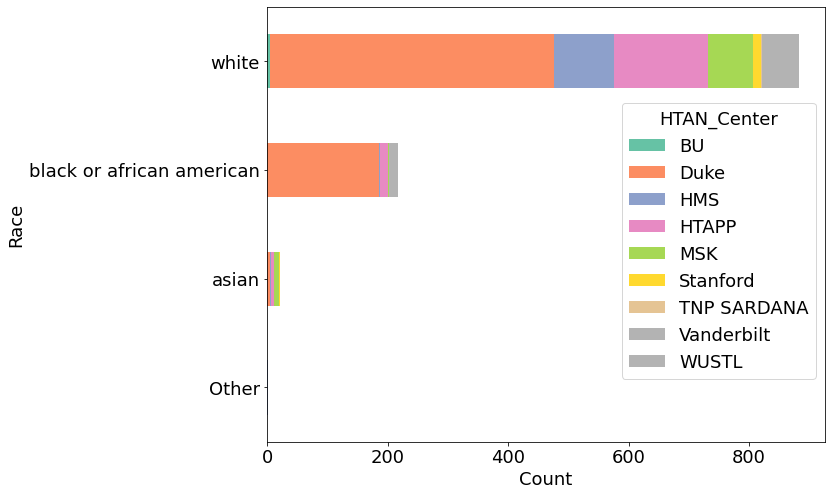

In [118]:
plt.rcParams.update({'font.size': 18})
demographics_race_reported.groupby(['Race','HTAN_Center']).size().unstack().plot.barh(stacked=True, figsize=(10,8), colormap='Set2')
plt.xlabel('Count')
plt.legend(bbox_to_anchor=(1, 0.8), title='HTAN_Center')

### 4.1.2 Gender
Similarly, here's a barchart showing the breakdown by Gender.

In [119]:
demographics_gender_reported = demographics[~demographics['Race'].isin(['Not Reported'])]
count = demographics_gender_reported.Gender.value_counts().rename_axis('Gender').to_frame('n')
perc = demographics_gender_reported['Gender'].value_counts(normalize=True).rename_axis('Gender').to_frame('Percent').round(decimals=3) * 100
pd.merge(count,perc, on='Gender',how='inner')

,n,Percent
Gender,,
female,955,83.5
male,189,16.5


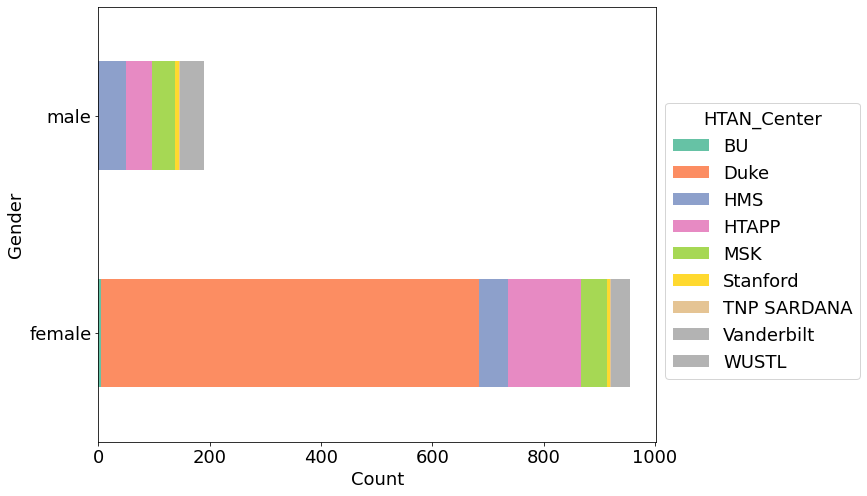

In [120]:
plt.rcParams.update({'font.size': 18})
demographics_gender_reported.groupby(['Gender','HTAN_Center']).size().unstack().plot.barh(stacked=True, figsize=(10,8), colormap='Set2')
plt.xlabel('Count')
plt.legend(bbox_to_anchor=(1, 0.8), title='HTAN_Center')

### 4.2 Treatment
Let's take a look at annotated treatment in HTAN. This can be found in the Therapy table.

In [121]:
therapy = client.query("""
  SELECT DISTINCT * EXCEPT(entityId, Component, Data_Release) FROM `isb-cgc-bq.HTAN.clinical_tier1_therapy_current` 
    """).result().to_dataframe()

therapy['HTAN_Center'] = [x.replace('HTAN ','') for x in therapy['HTAN_Center']]

Now filter this table to retrieve instances of annotated therapy.

In [122]:
therapy_yes = therapy[(therapy['Treatment_or_Therapy'].isin(["Yes"]) | ~therapy['Treatment_Type'].isnull()) & ~therapy['Treatment_Type'].isin(["Not Reported","None"])]

In [123]:
md("These are {} in number, for {} participants.".format(len(therapy_yes),len(therapy_yes['HTAN_Participant_ID'].unique())))

These are 483 in number, for 201 participants.

By center and treatment type:

In [124]:
therapy_yes.groupby(['HTAN_Center','Treatment_Type'])['Treatment_Type'].count()

HTAN_Center  Treatment_Type                    
BU           Chemotherapy                            1
CHOP         Chemotherapy                           25
HMS          Chemotherapy                           59
HTAPP        Chemotherapy                            4
             Radiation Therapy NOS                   1
             Stereotactic Radiosurgery               1
             Surgery                                11
MSK          Chemotherapy                          100
             Concurrent Chemoradiation               7
             External Beam Radiation                51
             Immunotherapy (Including Vaccines)     14
             Other                                   9
             Pharmaceutical Therapy NOS              2
             Radiation External Beam                37
             Stereotactic Radiosurgery               3
             Surgery                                56
             Targeted Molecular Therapy             18
             unkn

# 5. Analyzing Biospecimen Data in HTAN
Biospecimen data in HTAN conforms to the [Biospecimen Data](https://data.humantumoratlas.org/standard/biospecimen) standard,
and all annotated values can be obtained in a single BigQuery table.

In [125]:
biospecimen = client.query("""
  SELECT * EXCEPT(Component,entityId) FROM `isb-cgc-bq.HTAN.biospecimen_current` 
    """).result().to_dataframe()

biospecimen['HTAN_Participant_ID'] = biospecimen['HTAN_Biospecimen_ID'].str.split('_').str[:-1].str.join('_')

In [126]:
md("Number of unique biospecimens : {}, from {} participants.".format(len(biospecimen),len(biospecimen['HTAN_Participant_ID'].unique())))

Number of unique biospecimens : 4789, from 1228 participants.

As an example, let's take a look at the various storage methods used for HTAN biospecimens

### 5.1 Storage Methods

In [127]:
biospecimen_storage_noted = biospecimen[~biospecimen['Storage_Method'].isin(['unknown','Unknown'])]
pd.crosstab(biospecimen_storage_noted.Storage_Method,biospecimen_storage_noted.HTAN_Center)

HTAN_Center,HTAN BU,HTAN CHOP,HTAN Duke,HTAN HMS,HTAN HTAPP,HTAN MSK,HTAN Stanford,HTAN TNP SARDANA,HTAN Vanderbilt,HTAN WUSTL
Storage_Method,,,,,,,,,,
Ambient temperature,0,0,0,107,0,0,3,0,0,0
Fresh,15,0,0,0,484,50,0,0,107,0
Frozen at -150C,0,0,0,0,11,0,0,0,0,0
Frozen at -80C,0,0,0,222,302,0,1,0,62,313
Frozen in liquid nitrogen,0,34,0,0,60,7,201,0,0,0
Frozen in vapor phase,0,0,0,0,41,0,0,0,0,0
Paraffin block,0,0,1006,0,125,37,0,0,1,0
Refrigerated at 4 degrees,0,0,0,403,0,0,0,47,0,0


### 6. Assay types in HTAN

HTAN data is generated from multiple assay types, probing cancers and the tumor microenvironment at molecular, cellular, and tissue level,
using bulk, single-cell, and spatial assays. As described on the [HTAN Data Standards](https://data.humantumoratlas.org/standards)
page, generated data are arranged into data "Levels" corresponding to bioinformatic processing steps. In BigQuery, each
assay type and level is collected into a single table. Combining all of them (the query is a little long to display,
but can be seen in the code), we can tally the number of files available for each.

There are a total of 25321 annotated assay files. This is the breakdown by center and Component, which corresponds to assay type and Level.

In [128]:
apc = client.query("""
  with X as ( 
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.scRNAseq_level1_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.scRNAseq_level2_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.scRNAseq_level3_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.scRNAseq_level4_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.bulkRNAseq_level1_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.bulkRNAseq_level2_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.bulkRNAseq_level3_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.bulkWES_level1_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.bulkWES_level2_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.scATACseq_level1_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.scATACseq_level3_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.scATACseq_level4_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.metabolomics_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.proteomics_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.lipidomics_metadata_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.clinical_tier1_moleculartest_current`
  UNION ALL
  select Component, HTAN_Center from `isb-cgc-bq.HTAN.imaging_level2_metadata_current`
  )
  select Component, HTAN_Center, count(*) as Count from X
  group by Component, HTAN_Center
  order by Component, HTAN_Center
    """).result().to_dataframe()

apc['HTAN_Center'] = [x.replace('HTAN ','') for x in list(apc['HTAN_Center'])]

In [129]:
apc.pivot_table(index='Component',columns='HTAN_Center',values='Count',fill_value='0').astype(int)

HTAN_Center,BU,CHOP,Duke,HMS,HTAPP,MSK,OHSU,Stanford,TNP SARDANA,Vanderbilt,WUSTL
Component,,,,,,,,,,,
BulkRNA-seqLevel1,0,0,0,444,0,0,8,338,0,0,232
BulkRNA-seqLevel2,0,0,0,222,0,0,2,0,0,0,0
BulkRNA-seqLevel3,0,0,0,1,0,0,7,0,0,0,0
BulkWESLevel1,0,0,1174,0,0,0,144,108,0,194,208
BulkWESLevel2,0,0,0,0,0,0,19,0,0,97,0
ImagingLevel2,0,0,769,398,0,58,61,0,71,30,150
MolecularTest,0,30,340,1025,207,491,124,0,3,92,0
OtherAssay,0,0,0,0,0,0,0,1100,0,0,0
ScATAC-seqLevel1,0,240,0,0,0,0,0,640,0,0,0


# 7. Relevant Citations and Links

[Cell April 2020](https://www.sciencedirect.com/science/article/pii/S0092867420303469)
